### **Importando as Bibliotecas**

In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

import os
from google.colab import drive

drive.mount("/content/drive")

ModuleNotFoundError: No module named 'google.colab'

### **Objetivo: Analisar quais características da escola e da gestão escolar impacta na nota média de portugues do 5º ano na prova do SAEB**

# **Primeiro: REDUZIR A BASE**
    Selecionar apenas os dados referentes ao objetivo da análise, ou seja, apenas os dados da escola (localização, região, nome da escola, quantidade de salas, etc.), gestão escolar e a nota média de português do 5º ano.

In [1042]:
escolas = pd.read_csv("TS_ESCOLA.csv", encoding = "ISO-8859-1", engine='python')
escolas.head()

https://drive.google.com/file/d/1HsqNUR3BeGcCTKgyiwf53eoNo4r9Xq8G/view?usp=sharing

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_INICIAL,PC_FORMACAO_DOCENTE_FINAL,...,MEDIA_5EF_LP,MEDIA_5EF_MT,MEDIA_9EF_LP,MEDIA_9EF_MT,MEDIA_EMT_LP,MEDIA_EMT_MT,MEDIA_EMI_LP,MEDIA_EMI_MT,MEDIA_EM_LP,MEDIA_EM_MT
0,2019,1,11,1100015,2,11024666,3,2,100.0,64.4,...,184.83,210.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,11,1100015,2,11024682,2,1,100.0,80.4,...,223.45,245.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,11,1100015,2,11024828,3,1,100.0,48.9,...,158.06,194.74,239.76,244.94,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,11,1100015,2,11024968,2,1,NaN,NaN,...,NaN,NaN,NaN,NaN,306.34,313.39,NaN,NaN,306.34,313.39
4,2019,1,11,1100015,2,11025077,3,1,100.0,29.5,...,173.45,180.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1043]:
escolas.shape

(70606, 137)

In [1044]:
escolas.columns

Index(['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_AREA', 'ID_ESCOLA',
       'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'PC_FORMACAO_DOCENTE_INICIAL',
       'PC_FORMACAO_DOCENTE_FINAL',
       ...
       'MEDIA_5EF_LP', 'MEDIA_5EF_MT', 'MEDIA_9EF_LP', 'MEDIA_9EF_MT',
       'MEDIA_EMT_LP', 'MEDIA_EMT_MT', 'MEDIA_EMI_LP', 'MEDIA_EMI_MT',
       'MEDIA_EM_LP', 'MEDIA_EM_MT'],
      dtype='object', length=137)

In [1045]:
escolas = escolas.loc[:, ["ID_SAEB", "ID_REGIAO", "ID_UF", "ID_MUNICIPIO", "ID_AREA", "ID_ESCOLA",
                          "ID_DEPENDENCIA_ADM", "ID_LOCALIZACAO", "PC_FORMACAO_DOCENTE_INICIAL", 
                          "NIVEL_SOCIO_ECONOMICO", "NU_MATRICULADOS_CENSO_5EF", "NU_PRESENTES_5EF",
                          "TAXA_PARTICIPACAO_5EF", "NIVEL_0_LP5", "NIVEL_1_LP5", "NIVEL_2_LP5",
                          "NIVEL_3_LP5", "NIVEL_4_LP5", "NIVEL_5_LP5", "NIVEL_6_LP5", "NIVEL_7_LP5",
                          "NIVEL_8_LP5", "NIVEL_9_LP5", "MEDIA_5EF_LP"]]

escolas.head()

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_INICIAL,NIVEL_SOCIO_ECONOMICO,...,NIVEL_1_LP5,NIVEL_2_LP5,NIVEL_3_LP5,NIVEL_4_LP5,NIVEL_5_LP5,NIVEL_6_LP5,NIVEL_7_LP5,NIVEL_8_LP5,NIVEL_9_LP5,MEDIA_5EF_LP
0,2019,1,11,1100015,2,11024666,3,2,100.0,Nível IV,...,16.67,16.67,11.11,22.22,16.67,0.00,5.56,0.00,0.00,184.83
1,2019,1,11,1100015,2,11024682,2,1,100.0,Nível IV,...,3.31,11.53,13.11,20.43,26.40,11.96,8.58,3.35,0.67,223.45
2,2019,1,11,1100015,2,11024828,3,1,100.0,Nível IV,...,23.81,42.86,9.52,0.00,0.00,0.00,4.76,0.00,0.00,158.06
3,2019,1,11,1100015,2,11024968,2,1,NaN,Nível IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,11,1100015,2,11025077,3,1,100.0,Nível IV,...,15.38,30.77,15.38,30.77,0.00,0.00,0.00,0.00,0.00,173.45


In [1046]:
escolas.shape

(70606, 24)

In [1047]:
escolas.columns

Index(['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_AREA', 'ID_ESCOLA',
       'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'PC_FORMACAO_DOCENTE_INICIAL',
       'NIVEL_SOCIO_ECONOMICO', 'NU_MATRICULADOS_CENSO_5EF',
       'NU_PRESENTES_5EF', 'TAXA_PARTICIPACAO_5EF', 'NIVEL_0_LP5',
       'NIVEL_1_LP5', 'NIVEL_2_LP5', 'NIVEL_3_LP5', 'NIVEL_4_LP5',
       'NIVEL_5_LP5', 'NIVEL_6_LP5', 'NIVEL_7_LP5', 'NIVEL_8_LP5',
       'NIVEL_9_LP5', 'MEDIA_5EF_LP'],
      dtype='object')

In [1048]:
escolas.dtypes

ID_SAEB                          int64
ID_REGIAO                        int64
ID_UF                            int64
ID_MUNICIPIO                     int64
ID_AREA                          int64
ID_ESCOLA                        int64
ID_DEPENDENCIA_ADM               int64
ID_LOCALIZACAO                   int64
PC_FORMACAO_DOCENTE_INICIAL    float64
NIVEL_SOCIO_ECONOMICO           object
NU_MATRICULADOS_CENSO_5EF      float64
NU_PRESENTES_5EF               float64
TAXA_PARTICIPACAO_5EF          float64
NIVEL_0_LP5                    float64
NIVEL_1_LP5                    float64
NIVEL_2_LP5                    float64
NIVEL_3_LP5                    float64
NIVEL_4_LP5                    float64
NIVEL_5_LP5                    float64
NIVEL_6_LP5                    float64
NIVEL_7_LP5                    float64
NIVEL_8_LP5                    float64
NIVEL_9_LP5                    float64
MEDIA_5EF_LP                   float64
dtype: object

In [1049]:
escolas.isnull().sum().sort_values(ascending=False)

MEDIA_5EF_LP                   28524
NIVEL_0_LP5                    28524
NIVEL_9_LP5                    28524
NIVEL_8_LP5                    28524
NIVEL_7_LP5                    28524
NIVEL_6_LP5                    28524
NIVEL_5_LP5                    28524
NIVEL_4_LP5                    28524
NIVEL_3_LP5                    28524
NIVEL_2_LP5                    28524
NIVEL_1_LP5                    28524
TAXA_PARTICIPACAO_5EF          24068
NU_MATRICULADOS_CENSO_5EF      24068
NU_PRESENTES_5EF               24007
PC_FORMACAO_DOCENTE_INICIAL    23219
NIVEL_SOCIO_ECONOMICO           1738
ID_REGIAO                          0
ID_LOCALIZACAO                     0
ID_DEPENDENCIA_ADM                 0
ID_ESCOLA                          0
ID_AREA                            0
ID_MUNICIPIO                       0
ID_UF                              0
ID_SAEB                            0
dtype: int64

# **Segundo: INTEGRAÇÃO**

In [1050]:
diretores = pd.read_csv("TS_DIRETOR.csv")
diretores.head()

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,IN_PREENCHIMENTO_QUESTIONARIO,TX_RESP_Q001,...,TX_RESP_Q244,TX_RESP_Q245,TX_RESP_Q246,TX_RESP_Q247,TX_RESP_Q248,TX_RESP_Q249,TX_RESP_Q250,TX_RESP_Q251,TX_RESP_Q252,TX_RESP_Q253
0,2019,1,11,1100015,2,11024666,3,2,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D
1,2019,1,11,1100015,2,11024682,2,1,1,C,...,B,B,B,B,B,A,B,B,D,D
2,2019,1,11,1100015,2,11024828,3,1,1,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C
3,2019,1,11,1100015,2,11024968,2,1,1,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D
4,2019,1,11,1100015,2,11025077,3,1,1,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C


In [1051]:
diretores.shape

(74176, 262)

In [1052]:
diretores.columns

Index(['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_AREA', 'ID_ESCOLA',
       'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'IN_PREENCHIMENTO_QUESTIONARIO',
       'TX_RESP_Q001',
       ...
       'TX_RESP_Q244', 'TX_RESP_Q245', 'TX_RESP_Q246', 'TX_RESP_Q247',
       'TX_RESP_Q248', 'TX_RESP_Q249', 'TX_RESP_Q250', 'TX_RESP_Q251',
       'TX_RESP_Q252', 'TX_RESP_Q253'],
      dtype='object', length=262)

In [1053]:
m = pd.merge(diretores, escolas, how = 'inner', on = ['ID_SAEB', 'ID_ESCOLA', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_AREA', 'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO'])
m.head()

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,IN_PREENCHIMENTO_QUESTIONARIO,TX_RESP_Q001,...,NIVEL_1_LP5,NIVEL_2_LP5,NIVEL_3_LP5,NIVEL_4_LP5,NIVEL_5_LP5,NIVEL_6_LP5,NIVEL_7_LP5,NIVEL_8_LP5,NIVEL_9_LP5,MEDIA_5EF_LP
0,2019,1,11,1100015,2,11024666,3,2,1,A,...,16.67,16.67,11.11,22.22,16.67,0.00,5.56,0.00,0.00,184.83
1,2019,1,11,1100015,2,11024682,2,1,1,C,...,3.31,11.53,13.11,20.43,26.40,11.96,8.58,3.35,0.67,223.45
2,2019,1,11,1100015,2,11024828,3,1,1,C,...,23.81,42.86,9.52,0.00,0.00,0.00,4.76,0.00,0.00,158.06
3,2019,1,11,1100015,2,11024968,2,1,1,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,11,1100015,2,11025077,3,1,1,C,...,15.38,30.77,15.38,30.77,0.00,0.00,0.00,0.00,0.00,173.45


In [1054]:
m.shape

(71448, 278)

In [1055]:
m.columns

Index(['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_AREA', 'ID_ESCOLA',
       'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'IN_PREENCHIMENTO_QUESTIONARIO',
       'TX_RESP_Q001',
       ...
       'NIVEL_1_LP5', 'NIVEL_2_LP5', 'NIVEL_3_LP5', 'NIVEL_4_LP5',
       'NIVEL_5_LP5', 'NIVEL_6_LP5', 'NIVEL_7_LP5', 'NIVEL_8_LP5',
       'NIVEL_9_LP5', 'MEDIA_5EF_LP'],
      dtype='object', length=278)

In [1056]:
m.dtypes

ID_SAEB           int64
ID_REGIAO         int64
ID_UF             int64
ID_MUNICIPIO      int64
ID_AREA           int64
                 ...   
NIVEL_6_LP5     float64
NIVEL_7_LP5     float64
NIVEL_8_LP5     float64
NIVEL_9_LP5     float64
MEDIA_5EF_LP    float64
Length: 278, dtype: object

In [1057]:
m.isnull().sum().sort_values(ascending=False)[0:20]

TX_RESP_Q076    65416
TX_RESP_Q077    65414
TX_RESP_Q067    61504
TX_RESP_Q065    61352
TX_RESP_Q058    61352
TX_RESP_Q066    61352
TX_RESP_Q059    61352
TX_RESP_Q064    61352
TX_RESP_Q063    61352
TX_RESP_Q062    61352
TX_RESP_Q061    61352
TX_RESP_Q060    61352
TX_RESP_Q174    57265
TX_RESP_Q167    57265
TX_RESP_Q169    57265
TX_RESP_Q170    57265
TX_RESP_Q171    57265
TX_RESP_Q172    57265
TX_RESP_Q173    57265
TX_RESP_Q168    57265
dtype: int64

# **Terceiro: Limpeza de Dados**

In [1058]:
def Limpeza(variavelAlvo, dataset):
    df = dataset.copy()

    # 1 - Remove todas as LINHAS que possui valores ausentes na coluna ALVO
    if (variavelAlvo != None):
        df.dropna(subset=[variavelAlvo], inplace=True)

    # 2 - Remove dados duplicados
    df.drop_duplicates(inplace=True)

    # 3 - Remove todas as COLUNAS que possui 30% ou mais de valores ausentes
    columns = df.drop([variavelAlvo], axis=1).columns.tolist()
    for index in columns:
        if df[index].isnull().sum() > ((df.shape[0] * 20) / 100):
            df.drop([index], axis=1, inplace=True)

    # 4 - Remove todas as LINHAS que possuem valores ausentes
    df.dropna(inplace=True)

    # 5 - Remove todas as COLUNAS que possuem apenas um rótulo
    columns = df.drop([variavelAlvo], axis=1).columns.tolist()
    for index in columns:
        if len(df[index].unique().tolist()) == 1:
            df.drop([index], axis=1, inplace=True)
    

    print(df.shape, "\n")

    print(df.isnull().sum().sort_values(ascending=False))

    return df

In [1059]:
m = Limpeza("MEDIA_5EF_LP", m)

(13836, 205) 

ID_REGIAO       0
TX_RESP_Q188    0
TX_RESP_Q178    0
TX_RESP_Q179    0
TX_RESP_Q180    0
               ..
TX_RESP_Q085    0
TX_RESP_Q086    0
TX_RESP_Q087    0
TX_RESP_Q088    0
MEDIA_5EF_LP    0
Length: 205, dtype: int64


# **Quarto: Transformação de Dados**

#### **Renomear o Nome das Variáveis**

#### **Codificação de Variáveis Categóricas**

In [1060]:
# Dividindo os dados em treino e teste
dataset_train, dataset_test = train_test_split(m, test_size=0.30, random_state=12)

In [1061]:
# Transforma variáveis categóricas
categorico_ordinal = OrdinalEncoder()
categorico_nominal = OneHotEncoder(handle_unknown='ignore')

columns = m.select_dtypes(include=['object']).columns.tolist()

for index in columns:
    # Transforma variaveis categoricas NOMINAL
    if len(dataset_train[index].unique().tolist()) == 2:
        dataset_train[index] = dataset_train[index].replace(["A", "B"], [1, 0])
        dataset_test[index] = dataset_test[index].replace(["A", "B"], [1, 0])
    
    # Transforma variaveis categoricas NOMINAL
    elif len(dataset_train[index].unique().tolist()) == 3:
        transformed_train = categorico_nominal.fit_transform(dataset_train[[index]].values).toarray()
        dataset_train[categorico_nominal.get_feature_names_out([index])] = transformed_train
        dataset_train.drop([index], axis=1, inplace=True)

        transformed_test = categorico_nominal.transform(dataset_test[[index]].values).toarray()
        dataset_test[categorico_nominal.get_feature_names_out([index])] = transformed_test
        dataset_test.drop([index], axis=1, inplace=True)
    
    # Transforma variaveis categoricas ORDINAL
    elif len(dataset_train[index].unique().tolist()) >= 4:        
        dataset_train[index] = categorico_ordinal.fit_transform(dataset_train[[index]])
        dataset_test[index]  = categorico_ordinal.transform(dataset_test[[index]])


In [1062]:
# cada modelo vai ter um K diferente

# o que faz o metodo de filtagrem não ser tao bom quando o wrapper
# a seleção é feita de forma independente
# solução rápida e simples

#### **Padronização de Dados**

In [1063]:
# Transforma a escala dos dados
features = dataset_train.columns.tolist()

scaler = MinMaxScaler()

dataset_train = scaler.fit_transform(dataset_train)
dataset_test  = scaler.transform(dataset_test) 

dataset_train = pd.DataFrame(dataset_train, columns=features)
X_train = dataset_train.drop(["MEDIA_5EF_LP"], axis=1)
y_train = dataset_train["MEDIA_5EF_LP"]


dataset_test = pd.DataFrame(dataset_test, columns=features)
X_test = dataset_test.drop(["MEDIA_5EF_LP"], axis=1).values
y_test = dataset_test["MEDIA_5EF_LP"].values


# **Primeiro: REDUZIR A BASE**

    Usar algoritmo para selecionar as variáveis mais relevantes.

In [1064]:
# Redução - Seleciona as Features mais Relevantes

k_score = []

for k in range(2, dataset_train.shape[1]):

    select = SelectKBest(f_regression, k=k)

    X_train_ = select.fit_transform(X_train, y_train)
    X_test_ = select.transform(X_test)

    ml = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
    ml.fit(X_train_, y_train)

    y_pred = ml.predict(X_test_)

    score = mean_absolute_error(y_test, y_pred)
    k_score.append([k,round(score, 2)])

    print(k, round(score, 2))

k_score = sorted(k_score, key= lambda item : item[1])

2 0.05
3 0.03
4 0.03
5 0.02
6 0.02
7 0.01
8 0.01
9 0.01
10 0.01
11 0.01
12 0.01
13 0.01
14 0.01
15 0.01
16 0.01
17 0.01
18 0.01
19 0.01
20 0.01
21 0.01
22 0.01
23 0.01
24 0.01
25 0.01
26 0.01
27 0.01
28 0.01
29 0.01
30 0.01
31 0.01
32 0.01
33 0.01
34 0.01
35 0.01
36 0.01
37 0.01
38 0.01
39 0.01
40 0.01
41 0.01
42 0.01
43 0.01
44 0.01
45 0.01
46 0.01
47 0.01
48 0.01
49 0.01
50 0.01
51 0.01
52 0.01
53 0.01
54 0.01
55 0.01
56 0.01
57 0.01
58 0.01
59 0.01
60 0.01
61 0.01
62 0.01
63 0.01
64 0.01
65 0.01
66 0.01
67 0.01
68 0.01
69 0.01
70 0.01
71 0.01
72 0.01
73 0.01
74 0.01
75 0.01
76 0.01
77 0.01
78 0.01
79 0.01
80 0.01
81 0.01
82 0.01
83 0.01
84 0.01
85 0.01
86 0.01
87 0.01
88 0.01
89 0.01
90 0.01
91 0.01
92 0.01
93 0.01
94 0.01
95 0.01
96 0.01
97 0.01
98 0.01
99 0.01
100 0.01
101 0.01
102 0.01
103 0.01
104 0.01
105 0.01
106 0.01
107 0.01
108 0.01
109 0.01
110 0.01
111 0.01
112 0.01
113 0.01
114 0.01
115 0.01
116 0.01
117 0.01
118 0.01
119 0.01
120 0.01
121 0.01
122 0.01
123 0.01
124 0.01

In [1065]:
# Quanto menor for o score (o erro de predição), melhor será o modelo
pd.DataFrame(k_score, columns=["k", "score"]).sort_values(by=["score"], ascending=True)

,k,score
0,7,0.01
147,154,0.01
148,155,0.01
149,156,0.01
150,157,0.01
...,...,...
230,5,0.02
231,6,0.02
233,4,0.03
232,3,0.03


In [1066]:
select = SelectKBest(f_regression, k=k_score[0][0])

X_train_ = select.fit_transform(X_train, y_train)
X_test_ = select.transform(X_test)

features_mask = select.get_support(True)
print(features_mask)

names_features = select.get_support()
print(X_train.columns[names_features].tolist())

[178 179 180 183 184 185 186]
['NIVEL_0_LP5', 'NIVEL_1_LP5', 'NIVEL_2_LP5', 'NIVEL_5_LP5', 'NIVEL_6_LP5', 'NIVEL_7_LP5', 'NIVEL_8_LP5']


In [1067]:
# Quanto maior for o score, mais significativa é a variável
pd.DataFrame(select.scores_, index=X_train.columns, columns=["Scores"]).sort_values(by=["Scores"], ascending=False).head()

,Scores
NIVEL_1_LP5,16563.260487
NIVEL_6_LP5,12514.440076
NIVEL_7_LP5,11292.690573
NIVEL_2_LP5,10464.295800
NIVEL_0_LP5,9372.137541


In [1068]:
pd.DataFrame(select.pvalues_, index=X_train.columns, columns=["pvalue"]).sort_values(by=["pvalue"], ascending=True).head()

,pvalue
ID_REGIAO,0.0
NIVEL_SOCIO_ECONOMICO,0.0
NIVEL_0_LP5,0.0
NIVEL_1_LP5,0.0
NIVEL_2_LP5,0.0


In [1069]:
ml = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
ml.fit(X_train_, y_train)

y_pred = ml.predict(X_test_)

score = mean_absolute_error(y_test, y_pred)
print(round(score, 2))

0.01


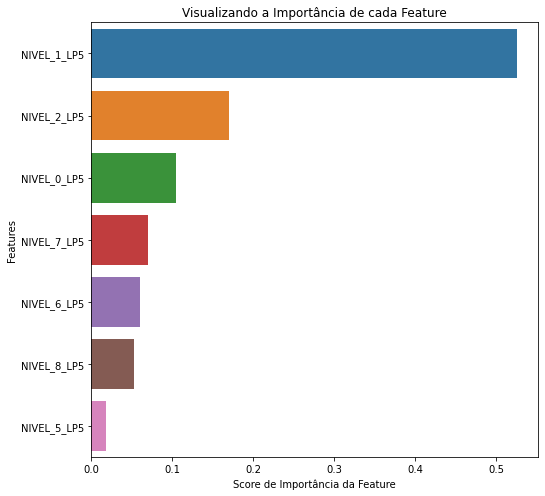

In [1070]:
import seaborn as sns
import matplotlib.pyplot as plt

features_ = dataset_train.drop(["MEDIA_5EF_LP"], axis=1)
features_ = features_.columns[features_mask].tolist()


feature_imp = pd.Series(ml.feature_importances_, index=features_).sort_values(ascending=False)

fig = plt.figure(figsize=(8,8))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Score de Importância da Feature')
plt.ylabel('Features')
plt.title("Visualizando a Importância de cada Feature")
plt.show()

In [1071]:
#reduzir  => limpar => integrar => limpar => reduzir
#esse é melhor

In [1072]:
# reduzir => integrar => reduzir => limpar